# Pizza Sales Project

# Import Libraries 

In [8]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

# Import Data From csv Files 

In [9]:
orders = pd.read_csv("orders.csv")
orders

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30
...,...,...,...
21345,21346,2015-12-31,20:51:07
21346,21347,2015-12-31,21:14:37
21347,21348,2015-12-31,21:23:10
21348,21349,2015-12-31,22:09:54


In [10]:
#check colunms data types and null values
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   order_id  21350 non-null  int64 
 1   date      21350 non-null  object
 2   time      21350 non-null  object
dtypes: int64(1), object(2)
memory usage: 500.5+ KB


In [12]:
# # We are using Datetime format to change the datatype of date and time for analysis from object
orders["date"] = pd.to_datetime(orders["date"])
orders["time"] = pd.to_datetime(orders["time"])

In [13]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   order_id  21350 non-null  int64         
 1   date      21350 non-null  datetime64[ns]
 2   time      21350 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1)
memory usage: 500.5 KB


In [14]:
od = pd.read_csv("order_details.csv")
od

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1
...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1
48616,48617,21348,four_cheese_l,1
48617,48618,21348,napolitana_s,1
48618,48619,21349,mexicana_l,1


In [15]:
od.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   order_details_id  48620 non-null  int64 
 1   order_id          48620 non-null  int64 
 2   pizza_id          48620 non-null  object
 3   quantity          48620 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [16]:
pizza = pd.read_csv("pizzas.csv")
pizza

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75
...,...,...,...,...
91,spinach_fet_m,spinach_fet,M,16.00
92,spinach_fet_l,spinach_fet,L,20.25
93,veggie_veg_s,veggie_veg,S,12.00
94,veggie_veg_m,veggie_veg,M,16.00


In [17]:
pizza.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pizza_id       96 non-null     object 
 1   pizza_type_id  96 non-null     object 
 2   size           96 non-null     object 
 3   price          96 non-null     float64
dtypes: float64(1), object(3)
memory usage: 3.1+ KB


In [19]:
pt = pd.read_csv("pizza_types.csv",encoding='unicode_escape')
pt

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."
5,thai_ckn,The Thai Chicken Pizza,Chicken,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha..."
6,big_meat,The Big Meat Pizza,Classic,"Bacon, Pepperoni, Italian Sausage, Chorizo Sau..."
7,classic_dlx,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
8,hawaiian,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
9,ital_cpcllo,The Italian Capocollo Pizza,Classic,"Capocollo, Red Peppers, Tomatoes, Goat Cheese,..."


In [20]:
pt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   pizza_type_id  32 non-null     object
 1   name           32 non-null     object
 2   category       32 non-null     object
 3   ingredients    32 non-null     object
dtypes: object(4)
memory usage: 1.1+ KB


# Merging files for Analysis 

In [27]:
df = pd.merge(orders , od , on = ["order_id"] , how = "inner")
df

,order_id,date,time,order_details_id,pizza_id,quantity
0,1,2015-01-01,2023-12-02 11:38:36,1,hawaiian_m,1
1,2,2015-01-01,2023-12-02 11:57:40,2,classic_dlx_m,1
2,2,2015-01-01,2023-12-02 11:57:40,3,five_cheese_l,1
3,2,2015-01-01,2023-12-02 11:57:40,4,ital_supr_l,1
4,2,2015-01-01,2023-12-02 11:57:40,5,mexicana_m,1
...,...,...,...,...,...,...
48615,21348,2015-12-31,2023-12-02 21:23:10,48616,ckn_alfredo_m,1
48616,21348,2015-12-31,2023-12-02 21:23:10,48617,four_cheese_l,1
48617,21348,2015-12-31,2023-12-02 21:23:10,48618,napolitana_s,1
48618,21349,2015-12-31,2023-12-02 22:09:54,48619,mexicana_l,1


In [28]:
df = pd.merge(df,pizza,on = ["pizza_id"] , how = 'inner' )
df

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price
0,1,2015-01-01,2023-12-02 11:38:36,1,hawaiian_m,1,hawaiian,M,13.25
1,77,2015-01-02,2023-12-02 12:22:46,179,hawaiian_m,1,hawaiian,M,13.25
2,146,2015-01-03,2023-12-02 14:22:10,357,hawaiian_m,1,hawaiian,M,13.25
3,163,2015-01-03,2023-12-02 16:54:54,389,hawaiian_m,1,hawaiian,M,13.25
4,247,2015-01-04,2023-12-02 20:55:29,568,hawaiian_m,1,hawaiian,M,13.25
...,...,...,...,...,...,...,...,...,...
48615,17492,2015-10-24,2023-12-02 18:58:20,39733,the_greek_xxl,1,the_greek,XXL,35.95
48616,18139,2015-11-05,2023-12-02 20:28:52,41183,the_greek_xxl,1,the_greek,XXL,35.95
48617,18789,2015-11-17,2023-12-02 11:23:51,42718,the_greek_xxl,1,the_greek,XXL,35.95
48618,18919,2015-11-19,2023-12-02 16:58:26,43041,the_greek_xxl,1,the_greek,XXL,35.95


In [32]:
All = pd.merge(df , pt , on = ["pizza_type_id"], how = "inner")
All

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients
0,1,2015-01-01,2023-12-02 11:38:36,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,77,2015-01-02,2023-12-02 12:22:46,179,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
2,146,2015-01-03,2023-12-02 14:22:10,357,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
3,163,2015-01-03,2023-12-02 16:54:54,389,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
4,247,2015-01-04,2023-12-02 20:55:29,568,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
...,...,...,...,...,...,...,...,...,...,...,...,...
48615,21167,2015-12-27,2023-12-02 17:39:57,48176,brie_carre_s,1,brie_carre,S,23.65,The Brie Carre Pizza,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni..."
48616,21198,2015-12-28,2023-12-02 15:39:02,48244,brie_carre_s,1,brie_carre,S,23.65,The Brie Carre Pizza,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni..."
48617,21225,2015-12-29,2023-12-02 13:20:17,48311,brie_carre_s,1,brie_carre,S,23.65,The Brie Carre Pizza,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni..."
48618,21282,2015-12-31,2023-12-02 12:09:59,48456,brie_carre_s,1,brie_carre,S,23.65,The Brie Carre Pizza,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni..."


# 1.Total Sales

In [35]:
All['Amount'] = All['quantity']*All['price']
All

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,Amount
0,1,2015-01-01,2023-12-02 11:38:36,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",13.25
1,77,2015-01-02,2023-12-02 12:22:46,179,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",13.25
2,146,2015-01-03,2023-12-02 14:22:10,357,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",13.25
3,163,2015-01-03,2023-12-02 16:54:54,389,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",13.25
4,247,2015-01-04,2023-12-02 20:55:29,568,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",13.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48615,21167,2015-12-27,2023-12-02 17:39:57,48176,brie_carre_s,1,brie_carre,S,23.65,The Brie Carre Pizza,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni...",23.65
48616,21198,2015-12-28,2023-12-02 15:39:02,48244,brie_carre_s,1,brie_carre,S,23.65,The Brie Carre Pizza,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni...",23.65
48617,21225,2015-12-29,2023-12-02 13:20:17,48311,brie_carre_s,1,brie_carre,S,23.65,The Brie Carre Pizza,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni...",23.65
48618,21282,2015-12-31,2023-12-02 12:09:59,48456,brie_carre_s,1,brie_carre,S,23.65,The Brie Carre Pizza,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni...",23.65


In [143]:
print("Total Sales is - ",All['Amount'].sum())

Total Sales is -  817860.05


# 2.Identify which pizza is ordered the most

In [106]:
gb1 = All.groupby("name").agg({"order_details_id":"count"})
gb1

,order_details_id
name,
The Barbecue Chicken Pizza,2372
The Big Meat Pizza,1811
The Brie Carre Pizza,480
The Calabrese Pizza,927
The California Chicken Pizza,2302
The Chicken Alfredo Pizza,980
The Chicken Pesto Pizza,961
The Classic Deluxe Pizza,2416
The Five Cheese Pizza,1359


In [107]:
most_o = gb1["order_details_id"].idxmax()
print("Most ordered pizza is",most_o)

Most ordered pizza is The Classic Deluxe Pizza


# 3. Identify which pizza is generating more sales

In [108]:
gb2 = All.groupby("name").agg({"Amount":"sum"})
gb2

,Amount
name,
The Barbecue Chicken Pizza,42768.00
The Big Meat Pizza,22968.00
The Brie Carre Pizza,11588.50
The Calabrese Pizza,15934.25
The California Chicken Pizza,41409.50
The Chicken Alfredo Pizza,16900.25
The Chicken Pesto Pizza,16701.75
The Classic Deluxe Pizza,38180.50
The Five Cheese Pizza,26066.50


In [109]:
His = gb2["Amount"].idxmax()
print("The highest sales generated pizza is - ",His)

The highest sales generated pizza is -  The Thai Chicken Pizza


# 4. Identify which pizza category is hotselling.

In [111]:
gb3 = All.groupby("category").agg({"order_details_id":"count"})
gb3

,order_details_id
category,
Chicken,10815
Classic,14579
Supreme,11777
Veggie,11449


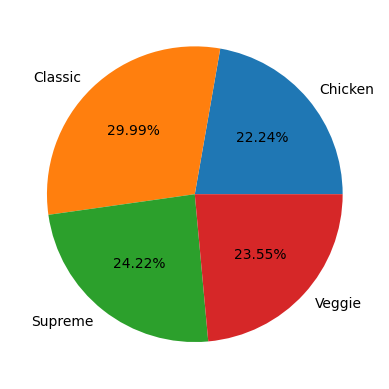

Most hotselling pizza category is -  Classic


In [114]:
plt.pie(x = gb3["order_details_id"], labels = gb3.index, autopct = "%1.2f%%")
plt.show()
Hsc = gb3["order_details_id"].idxmax()
print("Most hotselling pizza category is - ",Hsc)

# 5.identify the time at which we are getting high orders and the time at which we are getting the lowest orders

In [73]:
All['Hour'] = All['time'].dt.strftime("%H")
All

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,Amount,Hour
0,1,2015-01-01,2023-12-02 11:38:36,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",13.25,11
1,77,2015-01-02,2023-12-02 12:22:46,179,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",13.25,12
2,146,2015-01-03,2023-12-02 14:22:10,357,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",13.25,14
3,163,2015-01-03,2023-12-02 16:54:54,389,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",13.25,16
4,247,2015-01-04,2023-12-02 20:55:29,568,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",13.25,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48615,21167,2015-12-27,2023-12-02 17:39:57,48176,brie_carre_s,1,brie_carre,S,23.65,The Brie Carre Pizza,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni...",23.65,17
48616,21198,2015-12-28,2023-12-02 15:39:02,48244,brie_carre_s,1,brie_carre,S,23.65,The Brie Carre Pizza,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni...",23.65,15
48617,21225,2015-12-29,2023-12-02 13:20:17,48311,brie_carre_s,1,brie_carre,S,23.65,The Brie Carre Pizza,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni...",23.65,13
48618,21282,2015-12-31,2023-12-02 12:09:59,48456,brie_carre_s,1,brie_carre,S,23.65,The Brie Carre Pizza,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni...",23.65,12


In [115]:
gb4 = All.groupby("Hour").agg({"order_id": "count"})
gb4

,order_id
Hour,
09,4
10,17
11,2672
12,6543
13,6203
14,3521
15,3170
16,4185
17,5143


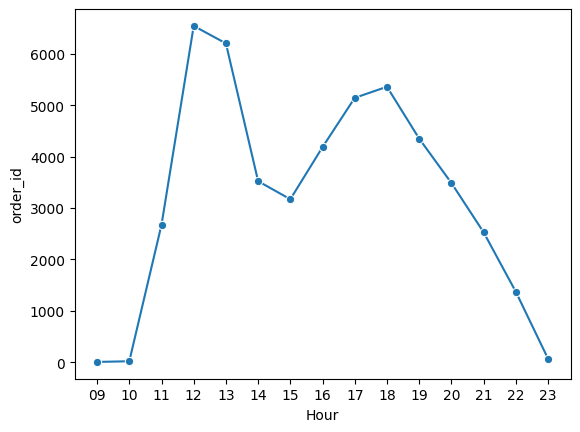

In [117]:
sns.lineplot(x = gb4.index , y = gb4["order_id"], marker = 'o',)
plt.show()

In [118]:
max = gb4["order_id"].idxmax()
min = gb4["order_id"].idxmin()
print("bussiest timig of order - ", max)
print("idle timing of order - ", min)


bussiest timig of order -  12
idle timing of order -  09


# 6. identify which day of the week we are getting the most orders.

In [95]:
All["Weekdays"] = All["date"].dt.strftime("%A")
All

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,Amount,Hour,Weekdays
0,1,2015-01-01,2023-12-02 11:38:36,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",13.25,11,Thursday
1,77,2015-01-02,2023-12-02 12:22:46,179,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",13.25,12,Friday
2,146,2015-01-03,2023-12-02 14:22:10,357,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",13.25,14,Saturday
3,163,2015-01-03,2023-12-02 16:54:54,389,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",13.25,16,Saturday
4,247,2015-01-04,2023-12-02 20:55:29,568,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",13.25,20,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48615,21167,2015-12-27,2023-12-02 17:39:57,48176,brie_carre_s,1,brie_carre,S,23.65,The Brie Carre Pizza,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni...",23.65,17,Sunday
48616,21198,2015-12-28,2023-12-02 15:39:02,48244,brie_carre_s,1,brie_carre,S,23.65,The Brie Carre Pizza,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni...",23.65,15,Monday
48617,21225,2015-12-29,2023-12-02 13:20:17,48311,brie_carre_s,1,brie_carre,S,23.65,The Brie Carre Pizza,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni...",23.65,13,Tuesday
48618,21282,2015-12-31,2023-12-02 12:09:59,48456,brie_carre_s,1,brie_carre,S,23.65,The Brie Carre Pizza,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni...",23.65,12,Thursday


In [119]:
gb5 = All.groupby("Weekdays").agg({"order_id" : "count"})
gb5

,order_id
Weekdays,
Friday,8106
Monday,6369
Saturday,7355
Sunday,5917
Thursday,7323
Tuesday,6753
Wednesday,6797


'Friday'

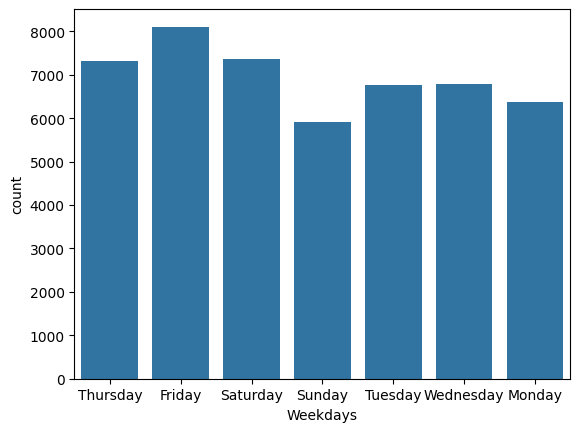

In [121]:
sns.countplot(x="Weekdays", data = All )


In [122]:
mod = gb5["order_id"].idxmax()
mod
print("Most orders are getting on - ", mod)

Most orders are getting on -  Friday


# 7. Identify at which time of the day, people are ordering more pizzas.       (morning/evening/afternoon/night)

In [127]:
All["Hour"] = All["Hour"].astype("int")
All.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          48620 non-null  int64         
 1   date              48620 non-null  datetime64[ns]
 2   time              48620 non-null  datetime64[ns]
 3   order_details_id  48620 non-null  int64         
 4   pizza_id          48620 non-null  object        
 5   quantity          48620 non-null  int64         
 6   pizza_type_id     48620 non-null  object        
 7   size              48620 non-null  object        
 8   price             48620 non-null  float64       
 9   name              48620 non-null  object        
 10  category          48620 non-null  object        
 11  ingredients       48620 non-null  object        
 12  Amount            48620 non-null  float64       
 13  Hour              48620 non-null  int32         
 14  Weekdays          4862

In [130]:
All.loc[(All['Hour']<12),'shift'] = "Morning"
All.loc[((All['Hour']>=12)&(All['Hour']<16)),'shift'] = "Afternoon"
All.loc[((All['Hour']>=16)&(All['Hour']<21)),'shift'] = "Evening"
All.loc[(All['Hour']>=21),'shift'] = "Night"
All

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,Amount,Hour,Weekdays,shift
0,1,2015-01-01,2023-12-02 11:38:36,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",13.25,11,Thursday,Morning
1,77,2015-01-02,2023-12-02 12:22:46,179,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",13.25,12,Friday,Afternoon
2,146,2015-01-03,2023-12-02 14:22:10,357,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",13.25,14,Saturday,Afternoon
3,163,2015-01-03,2023-12-02 16:54:54,389,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",13.25,16,Saturday,Evening
4,247,2015-01-04,2023-12-02 20:55:29,568,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",13.25,20,Sunday,Evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48615,21167,2015-12-27,2023-12-02 17:39:57,48176,brie_carre_s,1,brie_carre,S,23.65,The Brie Carre Pizza,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni...",23.65,17,Sunday,Evening
48616,21198,2015-12-28,2023-12-02 15:39:02,48244,brie_carre_s,1,brie_carre,S,23.65,The Brie Carre Pizza,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni...",23.65,15,Monday,Afternoon
48617,21225,2015-12-29,2023-12-02 13:20:17,48311,brie_carre_s,1,brie_carre,S,23.65,The Brie Carre Pizza,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni...",23.65,13,Tuesday,Afternoon
48618,21282,2015-12-31,2023-12-02 12:09:59,48456,brie_carre_s,1,brie_carre,S,23.65,The Brie Carre Pizza,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni...",23.65,12,Thursday,Afternoon


<Axes: xlabel='shift', ylabel='count'>

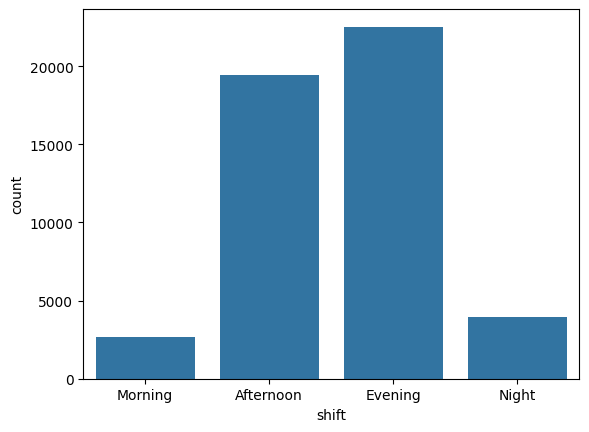

In [131]:
sns.countplot(x='shift',data = All)

In [137]:
gb6 = All.groupby("shift").agg({"order_id" : "count"})
gb6

,order_id
shift,
Afternoon,19437
Evening,22524
Morning,2693
Night,3966


In [140]:
mos = gb6["order_id"].idxmax()
mos
print("Most orders are getting at - ", mos)

Most orders are getting at -  Evening
